# Data Science

Vous êtes datascientist chez Kickstarter, une plate-forme de crowdfunding. Vous souhaitez prédire la réussite ou non d'un projet . Avant de créer votre classifieur, vous entreprenez de faire une analyse préparatoire des données (EDA) pour avoir une meilleure intuition sur ces dernières.

Vous avez accès à toutes les ressources que vous souhaitez (cheatsheet, internet, etc.). N'hésitez pas à en faire bon usage.

Pensez à bien organiser votre notebook, à annoter vos graphiques et à les commenter judicieusement. Parmis les critères de notation :

    savoir charger un dataset,
    analyse des valeurs manquantes et dupliquées,
    analyse des outliers,
    analyse univariée,
    analyse multivariée,
    ainsi que toute analyse qui vous semble judicieuse pour prédire le succès d’un projet Kickstarter.

Rendu

Vous rendrez votre Jupyter Notebook via Github. Pour cela créez un nouveau dépôt (repository) nommé EDA2018 et uploadez le notebook seul sur ce dépôt. Ensuite, envoyez le lien dans un mail aux adresses suivantes :

    alain.demenet@gmail.com
    florent.pietot@gmail.com

Ajoutez en pièce jointe votre notebook zippé (afin d'avoir une double sauvegarde de votre travail et pour éviter tout problème éventuel).
Description du dataset

Le dataset dataset.csv est un instantané du site en janvier 2018 :
Colonne 	Description
ID 	internal kickstarter id
name 	name of project - a project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films
category 	category
main_category 	category of campaign
currency 	currency used to support
deadline 	deadline for crowdfunding
goal 	fundraising goal - the funding goal is the amount of money that a creator needs to complete their project
launched 	date launched
pledged 	pledged amount in the project currency
state 	current condition the project is in
backers 	number of backers
country 	country pledged from
usd pledged 	amount of money pledged in USD (conversion made by Kickstarter)
usd_pledged_real 	amount of money pledged in USD (conversion made by fixer.io api)
usd_goal_real 	goal amount in USD (conversion made by fixer.io api)

Bon courage !

# 1. Importation des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline
sns.set({'figure.figsize':(16,8)})

In [3]:
import matplotlib as mpl
mpl.rcParams["axes.titlesize"] = 18

# 2. Importation du Dataset

In [4]:
# df = pd.read_csv("dataset.csv", parse_dates=['deadline','launched'], converters={'ID': str})
#FILEPATH = join("data", "kickstarter.csv")
#FILEPATH
FILEPATH = '../downloads/kickstarter.csv'

In [5]:
df = pd.read_csv(FILEPATH)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
# On va faire un parse des dates
df = pd.read_csv(FILEPATH, parse_dates=['deadline','launched'], converters={'ID': str})
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [7]:
df.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null object
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(1), object(7)
memory usage: 43.3+ MB


In [9]:
type(df.deadline)

pandas.core.series.Series

In [10]:
print("Le dataset comporte {} samples et {} variables.".format(df.shape[0], df.shape[1]))

Le dataset comporte 378661 samples et 15 variables.


In [11]:
num_col = []
text_col = []
date_col = []
for c in df.columns:
    if df[c].dtype == 'object':
        text_col.append(c)
    elif df[c].dtype == '<M8[ns]':
        date_col.append(c)
    else:
        num_col.append(c)
print(f"Le data a:\t{len(num_col)} numériques colonnes,\n\t\t{len(text_col)} type string colonne,\n\t\t{len(date_col)} type date colonne")


Le data a:	6 numériques colonnes,
		7 type string colonne,
		2 type date colonne


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
goal,378661.0,49080.791521,1.183391e+06,0.01,2000.00,5200.00,16000.00,1.000000e+08
pledged,378661.0,9682.979339,9.563601e+04,0.00,30.00,620.00,4076.00,2.033899e+07
backers,378661.0,105.617476,9.071850e+02,0.00,2.00,12.00,56.00,2.193820e+05
usd pledged,374864.0,7036.728867,7.863975e+04,0.00,16.98,394.72,3034.09,2.033899e+07
usd_pledged_real,378661.0,9058.924074,9.097334e+04,0.00,31.00,624.33,4050.00,2.033899e+07
usd_goal_real,378661.0,45454.401465,1.152950e+06,0.01,2000.00,5500.00,15500.00,1.663614e+08


# 3. analyse des données manquantes et/ou dupliquées,

In [13]:
# Données dupliquées
print(f"Data Frame a {df.shape[0]} lignes et {df.shape[1]} colonnes")
print(f"La colonne d'ID a {df.ID.nunique()} de la valeur identique")
df.duplicated().sum()

Data Frame a 378661 lignes et 15 colonnes
La colonne d'ID a 378661 de la valeur identique


0

Il n'y a pas de doublons dans le Dataset

In [14]:
# Données manquantes
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [15]:
df[df.name.isna()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


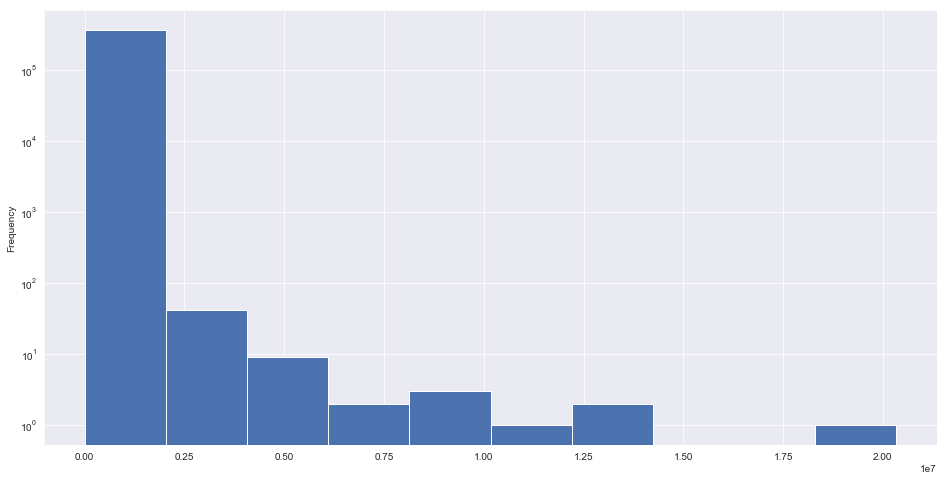

In [16]:
fig, ax = plt.subplots()
df['usd pledged'].dropna().plot.hist(ax=ax)
ax.set_yscale('log')

In [17]:
#df[df['usd pledged'].isna() & (df.state == 'successful')]
#df[(df['usd pledged'] == 0.) & (df.state == 'successful')]
df['usd pledged'].mean()

7036.728867109212



On a deux colonnes qui contiennent des données manquantes (NaN)

- Pour la colonne 'name', il y a 4 données manquantes. Cette colonne est définie comme l'intitulé du titre du projet à prédire... 

- la colonne 'category' est  importante et sera explorée en dessous.

- Dans ce contexte, toutes les données manquantes de 'name' seront remplacées par 'unknown'. Elles peuvent aussi être supprimées, mais dans ce cas, si on utilisera 'unknown'.

- Pour la colonne 'usd pledged', les données manquantes seront remplacées par la moyenne de cette colonne.


## remplacement des valeurs manquantes

In [18]:
df.name.fillna('unknown', inplace=True)
df["usd pledged"].fillna(df['usd pledged'].mean(), inplace=True)
# re-tester des valeurs manquants
df.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

# 4. Analyse des Outliers

Text(0.5,0.98,'Analyse des outliers')

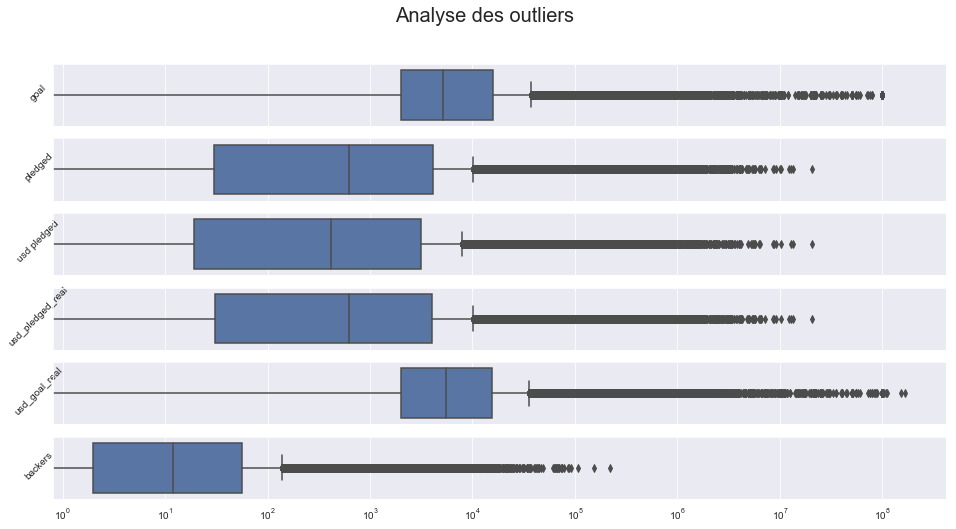

In [19]:
fig, ax = plt.subplots(6, sharex=True)
for i,c in enumerate(["goal","pledged","usd pledged","usd_pledged_real","usd_goal_real","backers"]):
    sns.boxplot(df[c],ax=ax[i])
    ax[i].set_xscale("log")
    ax[i].set_xlabel("")
    ax[i].set_ylabel(c, fontsize=10,rotation=45)
fig.suptitle('Analyse des outliers', fontsize=20)
#fig.set_figheight(25)


In [20]:
df[df.backers == df.backers.max()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0


On a beaucoup d'outliers dans les colonnes numériques, mais on ne va pas les supprimer.
Ils ont une influence certaine sur la réussite du projet.
- On va normaliser les données parce qu'elles sont volumineuses et ainsi régler le problème rencontré avec le nombre important d'outliers. 

In [21]:
for c in num_col:
    df[c + "_norm"] = np.log(df[c] + 1)

# 5. Analyse Univariée

Dans un premier temps, On va observer toutes les données de chaque colonne contenue dans le Dataset

In [22]:
df.nunique()

ID                       378661
name                     375765
category                    159
main_category                15
currency                     14
deadline                   3164
goal                       8353
launched                 378089
pledged                   62130
state                         6
backers                    3963
country                      23
usd pledged               95456
usd_pledged_real         106065
usd_goal_real             50339
goal_norm                  8353
pledged_norm              62130
backers_norm               3963
usd pledged_norm          95456
usd_pledged_real_norm    106065
usd_goal_real_norm        50339
dtype: int64

In [23]:
df[text_col].nunique()

ID               378661
name             375765
category            159
main_category        15
currency             14
state                 6
country              23
dtype: int64

- Les colonnes 'name' et 'ID' n'ont pas d'incidence dans la prédiction de la réussite du projet, elles seront mise de côté

## La colonne 'state'

In [24]:
df.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

- La colonne 'state' peut prendre 4 valeurs (failed, cancelled, suspended, successfull).

Cette colonne est le target du projet, c'est elle qui est la donnée clé qui nous permettra de dire si un projet est réussi ou non.

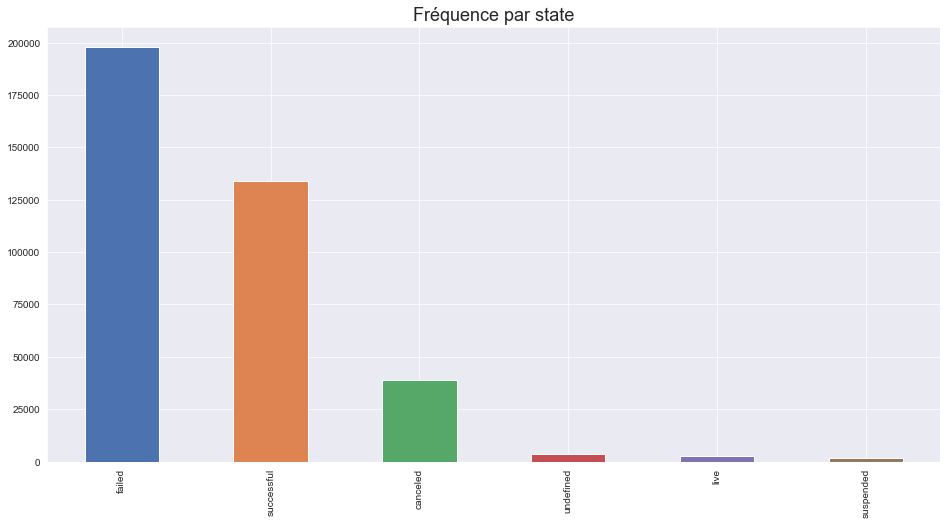

In [25]:
df.state.value_counts().plot.bar(title='Fréquence par state')

- On a un cas d'unbalanced label

- On remarque que dans la colonne 'state' la proportion de chaque catégorie est très différente, 'failed' dommine 'successful' qui domine 'canceled'    

- 'suspended','live','undefined' ont des valeurs très negligeables par rapport au trio précédent. 

Pour l'apprentissage supervisé, unbalanced label est un gros problème

Notre objectif est de prédire si le projet va réussir, on va juste s'interesser aux valeurs de 'failed' et 'successful'. 


In [26]:
df_failed = df[df.state == "failed"]
df_successfull = df[df.state == "successful"]
df2 = df[df.state.isin(["failed","successful"])].copy()

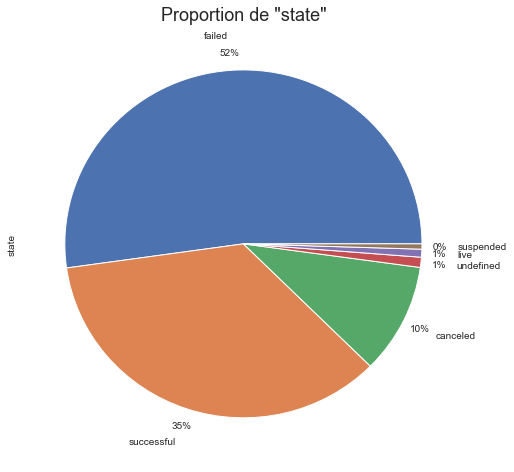

In [27]:
df.state.value_counts().plot.pie(title='Proportion de "state"', figsize=(8,8),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

/Users/mbp/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


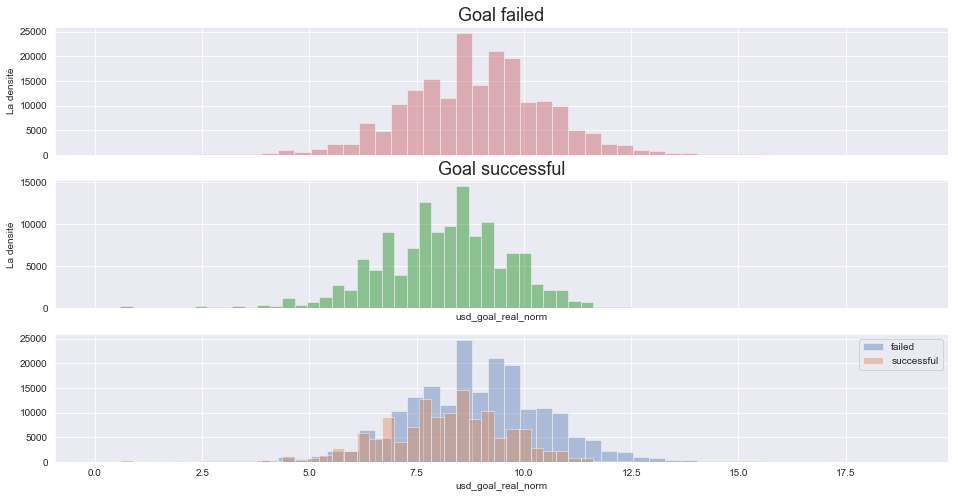

In [28]:
fig, ax = plt.subplots(3, sharex=True)
sns.distplot(df_failed["usd_goal_real_norm"], ax=ax[0], color='r', kde=False)
ax[0].set_title("Goal failed")
ax[0].set_xlabel("")
ax[0].set_ylabel("La densité")
sns.distplot(df_successfull["usd_goal_real_norm"], ax=ax[1], color='green', kde=False)
ax[1].set_title("Goal successful")
ax[1].set_ylabel("La densité")
for a in ["failed", "successful"]:
    sns.distplot(df.loc[df.state == a,"usd_goal_real_norm"], ax=ax[2], kde=False)
ax[2].legend(["failed", "successful"])
#df[df.state == "successful"]

(array([3.1600e+02, 2.9000e+01, 1.1700e+02, 4.1500e+02, 4.6300e+02,
        6.4400e+02, 2.2400e+03, 4.5560e+03, 1.0504e+04, 1.5195e+04,
        2.1062e+04, 3.2049e+04, 2.1701e+04, 1.4434e+04, 6.9440e+03,
        2.3760e+03, 5.7400e+02, 2.4600e+02, 7.0000e+01, 2.1000e+01]),
 array([9.95033085e-03, 7.34885726e-01, 1.45982112e+00, 2.18475652e+00,
        2.90969191e+00, 3.63462731e+00, 4.35956270e+00, 5.08449810e+00,
        5.80943349e+00, 6.53436889e+00, 7.25930428e+00, 7.98423968e+00,
        8.70917508e+00, 9.43411047e+00, 1.01590459e+01, 1.08839813e+01,
        1.16089167e+01, 1.23338521e+01, 1.30587874e+01, 1.37837228e+01,
        1.45086582e+01]),
 <a list of 20 Patch objects>)

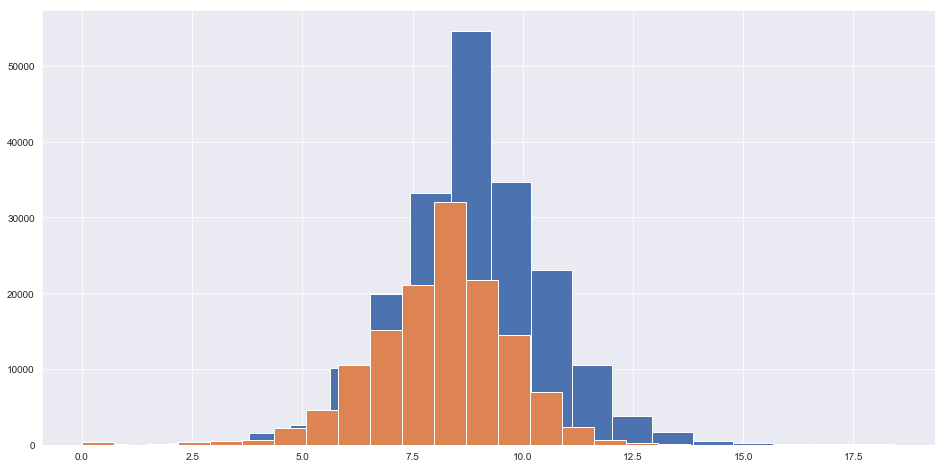

In [29]:


fig, ax = plt.subplots()
ax.hist(df_failed["goal_norm"], bins=20)
ax.hist(df_successfull["goal_norm"], bins=20)



## goal vs usd_goal_real

(array([3.1600e+02, 2.9000e+01, 1.1700e+02, 4.1500e+02, 4.6300e+02,
        6.4400e+02, 2.2400e+03, 4.5560e+03, 1.0504e+04, 1.5195e+04,
        2.1062e+04, 3.2049e+04, 2.1701e+04, 1.4434e+04, 6.9440e+03,
        2.3760e+03, 5.7400e+02, 2.4600e+02, 7.0000e+01, 2.1000e+01]),
 array([9.95033085e-03, 7.34885726e-01, 1.45982112e+00, 2.18475652e+00,
        2.90969191e+00, 3.63462731e+00, 4.35956270e+00, 5.08449810e+00,
        5.80943349e+00, 6.53436889e+00, 7.25930428e+00, 7.98423968e+00,
        8.70917508e+00, 9.43411047e+00, 1.01590459e+01, 1.08839813e+01,
        1.16089167e+01, 1.23338521e+01, 1.30587874e+01, 1.37837228e+01,
        1.45086582e+01]),
 <a list of 20 Patch objects>)

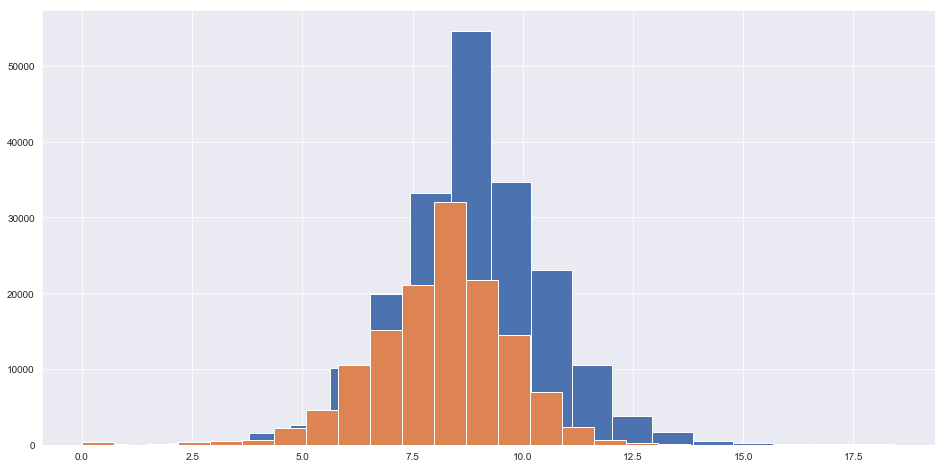

In [31]:
fig, ax = plt.subplots()
ax.hist(df_failed["goal_norm"], bins=20)
ax.hist(df_successfull["goal_norm"], bins=20)

## pledged vs usd pledged

Text(0.5,1,'usd pledged norm')

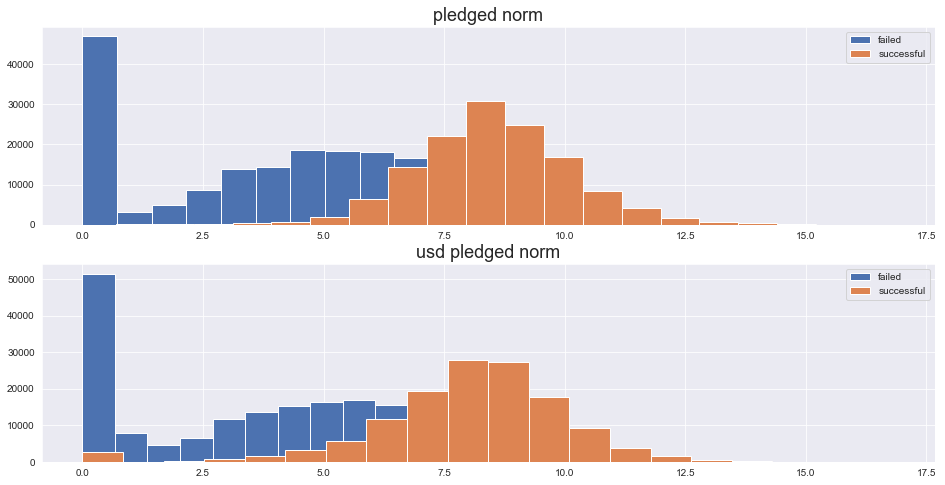

In [32]:
fig, ax = plt.subplots(2)
ax[0].hist(df_failed["pledged_norm"], bins=20)
ax[0].hist(df_successfull["pledged_norm"], bins=20)
ax[0].legend(["failed", "successful"])
ax[0].set_title("pledged norm")
ax[1].hist(df_failed["usd pledged_norm"], bins=20)
ax[1].hist(df_successfull["usd pledged_norm"], bins=20)
ax[1].legend(["failed", "successful"])
ax[1].set_title("usd pledged norm")

## category

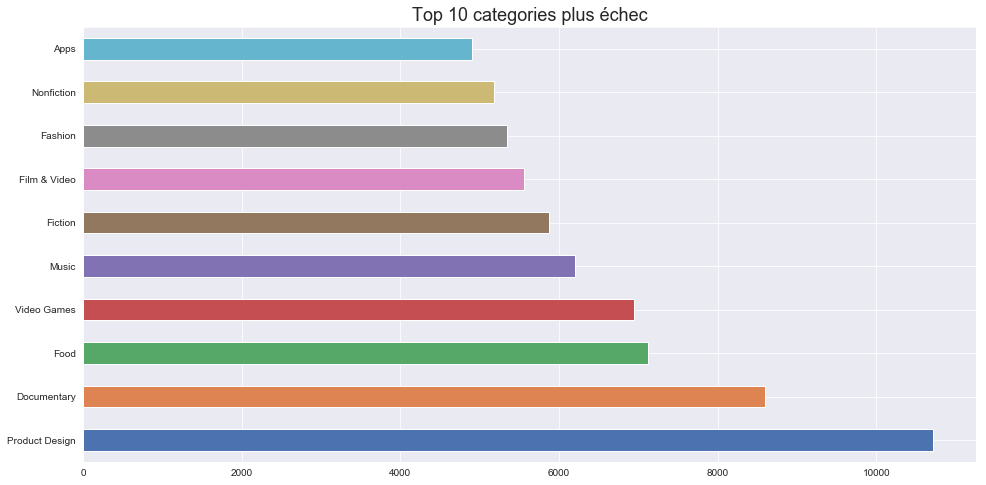

In [33]:
# Top 10 categories avec le plus d'échec
df_failed.category.value_counts(sort=True).head(10).plot.barh(title="Top 10 categories plus échec")

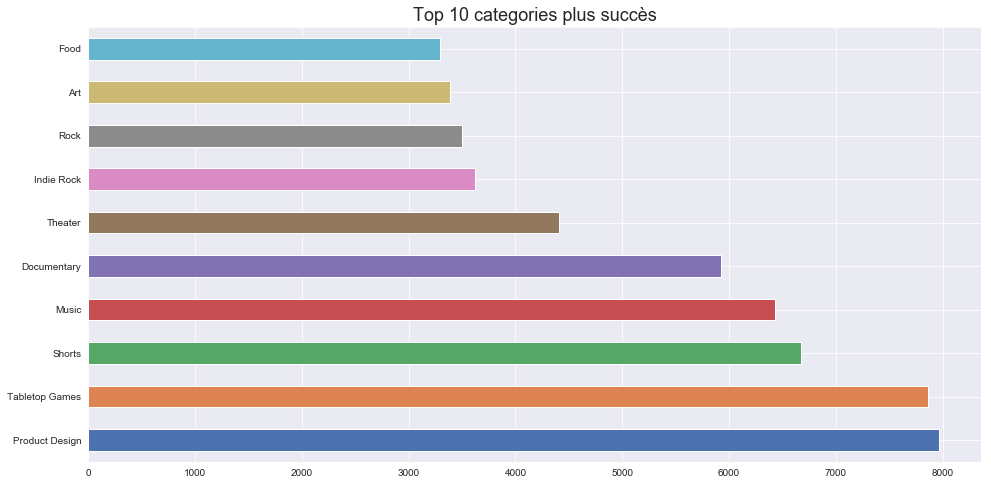

In [34]:
# Top 10 categories plus succès
df_successfull.category.value_counts(sort=True).head(10).plot.barh(title="Top 10 categories plus succès")

Au niveau de category: 
- Product Design est la catégorie ayant enrégistré le plus de succès et dans le même temps le plus d'échec, 
cependant le volume d'échec est plus grand. 

## main_category

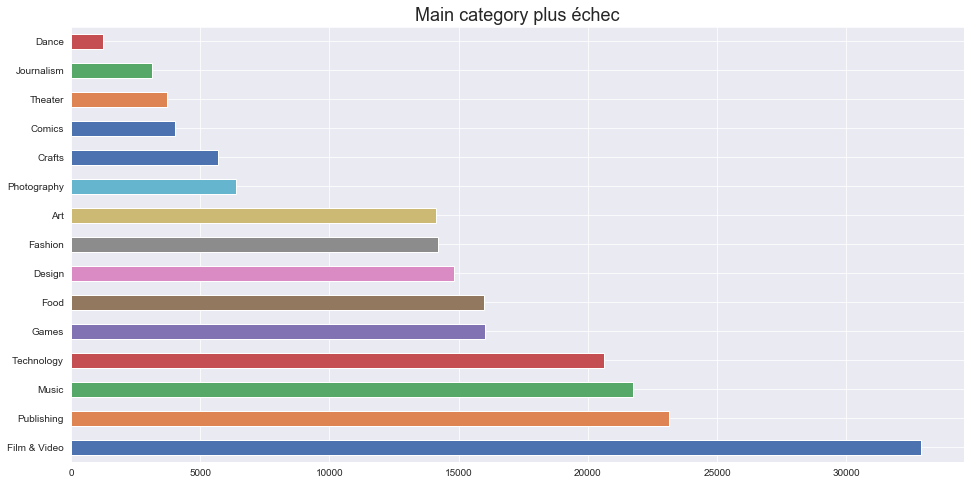

In [38]:
# main categories plus grands échecs
df_failed.main_category.value_counts(sort=True).plot.barh(title="Main category plus échec")

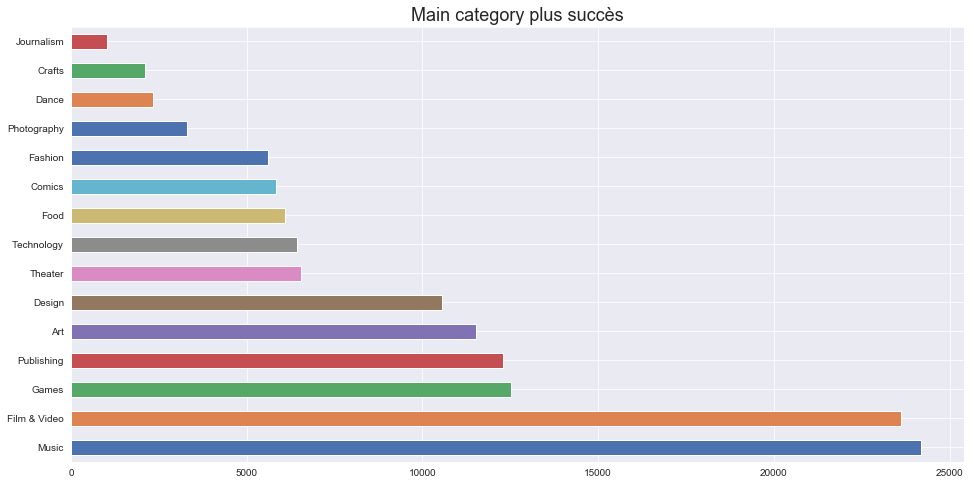

In [39]:
# Main categories plus grands succès
df_successfull.main_category.value_counts(sort=True).plot.barh(title="Main category plus succès")

Les main_category les plus converties sont: 
- Music  
- Film & Video 

## currency

In [41]:
df.currency.unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

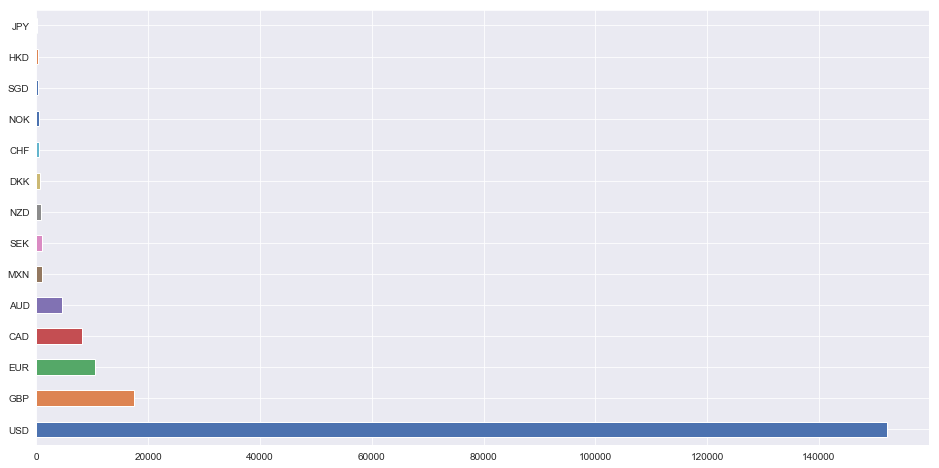

In [42]:
df_failed["currency"].value_counts(sort=True).plot.barh()

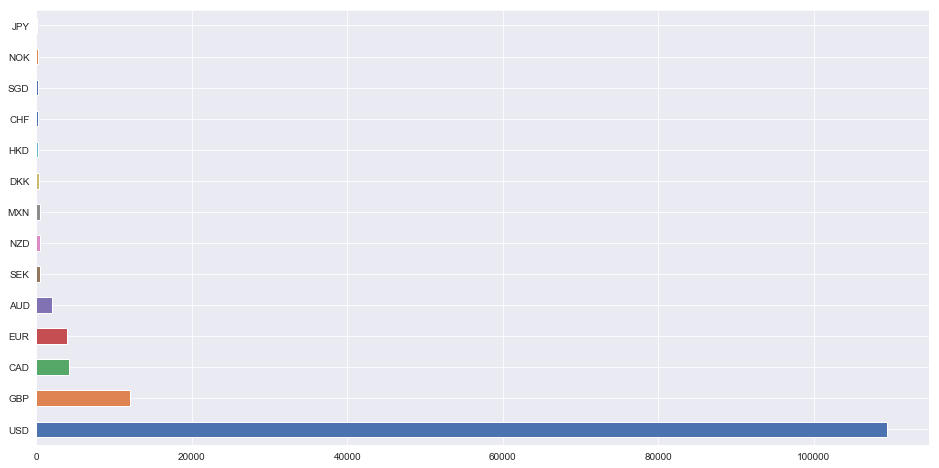

In [43]:
df_successfull["currency"].value_counts(sort=True).plot.barh()

## backers

## above the third quartile + 3 ∗ interquartile range


In [45]:
df['backers'].quantile(0.75) + 3*df['backers'].quantile(0.5)

92.0

On defini que tout backers supérieur à 92 est consideré comme un outlier

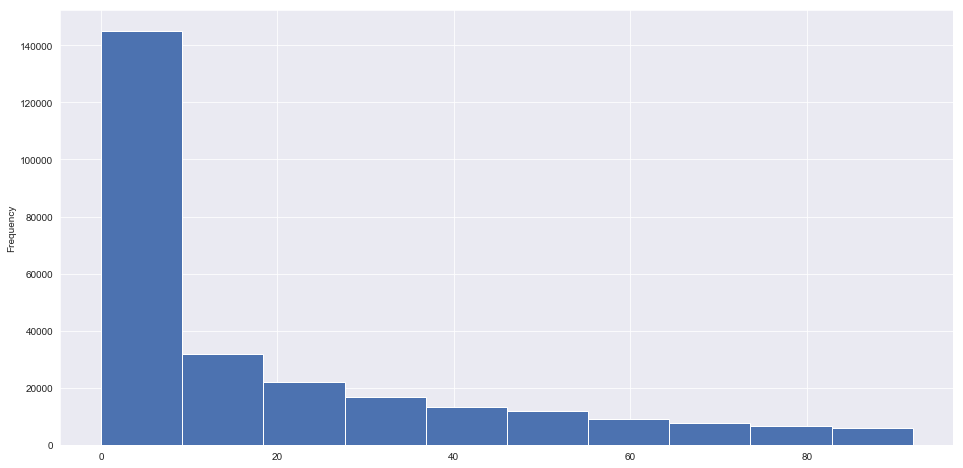

In [46]:
df2[df2.backers <= 92]["backers"].plot.hist()

In [47]:
df2['backers_outliers'] = [True if i > 92 else False for i in df2['backers']]

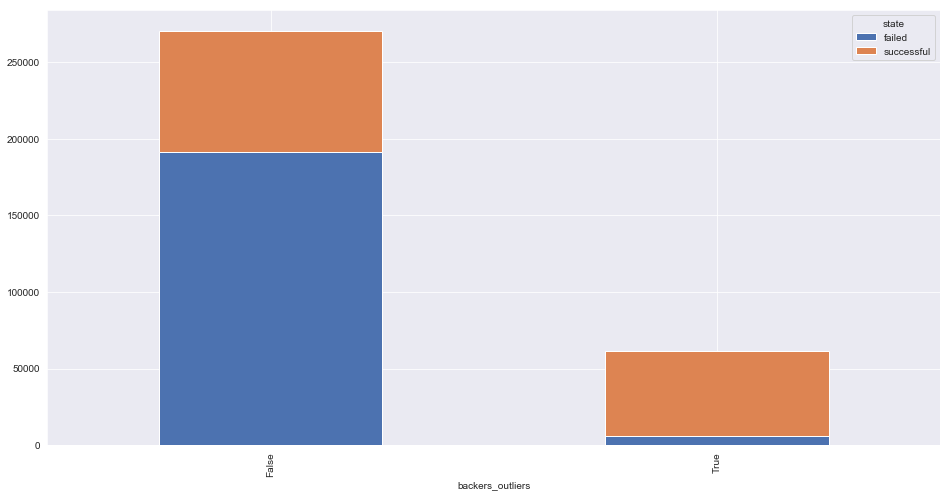

In [48]:
df2.groupby('backers_outliers')['state'].value_counts().unstack().plot.bar(stacked=True)

Beaucoup de 'backers', le projet beneficie de beaucoup de soutien, il a plus de chance de réussir
On a aussi constaté que la majorité des outliers de 'backers' sont des projets réussis

Text(0.5,0,'Backers normed (log)')

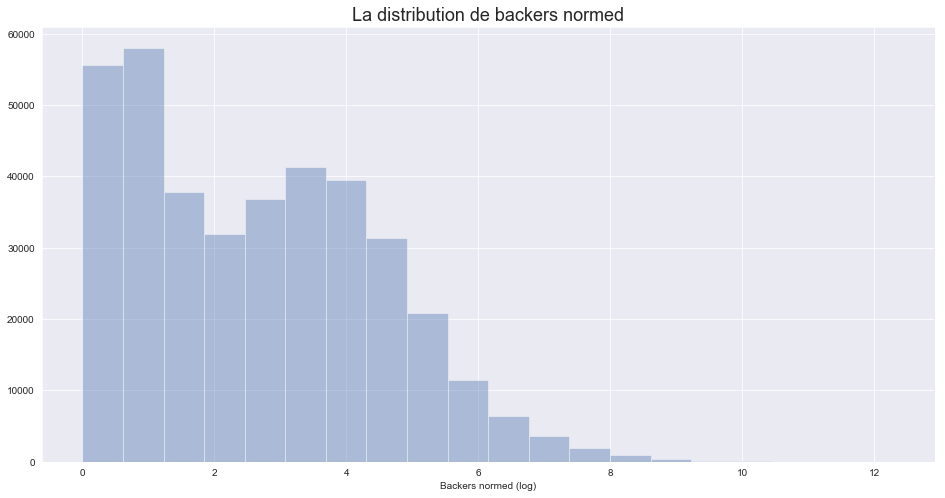

In [50]:
sns.distplot(df["backers_norm"], kde=False, bins=20)
plt.title("La distribution de backers normed")
plt.xlabel("Backers normed (log)")

/Users/mbp/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Backers distribution en state')

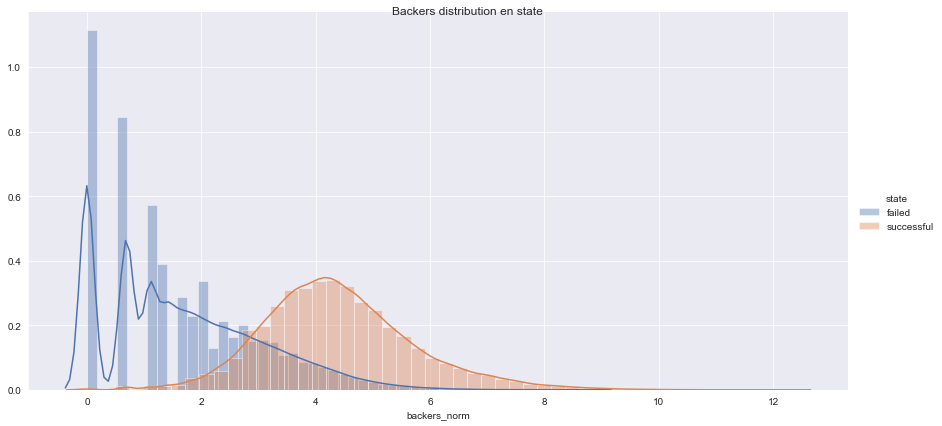

In [51]:
g = sns.FacetGrid(df2, hue='state', height=6, aspect=2)
g.map(sns.distplot,'backers_norm')
g.add_legend()
g.fig.suptitle("Backers distribution en state")

Ce graphe nous dit que plus on a de backers, plus a des chances que le projet réussisse

## country

In [54]:
df2.country.value_counts()

US      261360
GB       29454
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       210
LU          57
JP          23
Name: country, dtype: int64

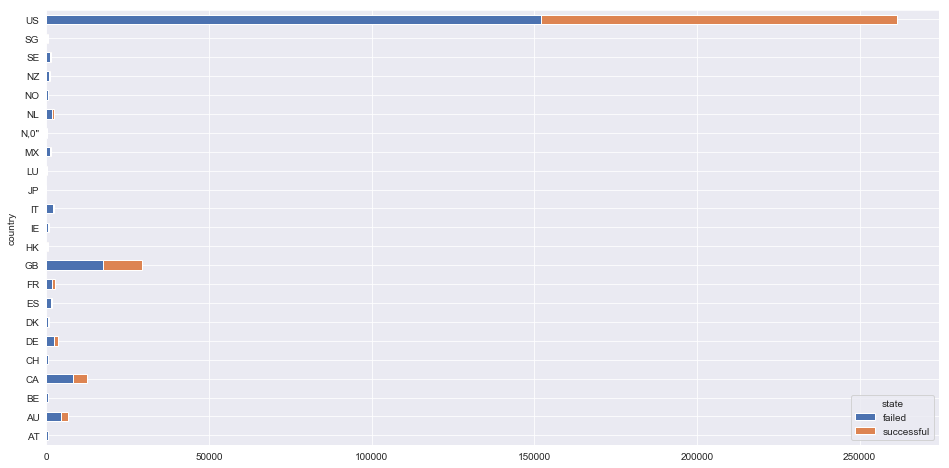

In [55]:
df2.groupby('country')['state'].value_counts().unstack().plot.barh(stacked=True)

USD est le devise plus utilisée dans le crowdfunding, 
GBP, EUR, CAD, AUD viennent ensuite

## date launched

In [57]:
df2['launched_year'] = df2['launched'].dt.year
df2['launched_day'] = df2['launched'].dt.dayofweek
df2['launched_hour'] = df2['launched'].dt.hour
df2['launched_quarter'] = df2['launched'].dt.quarter

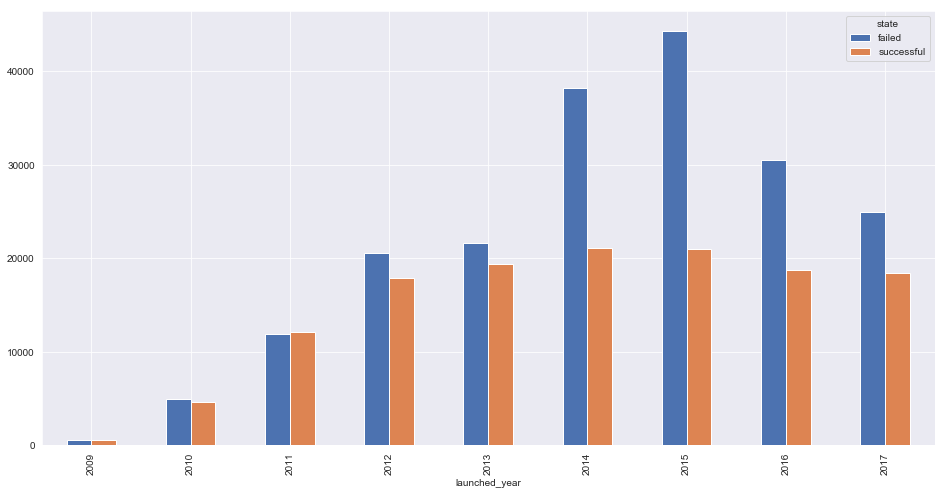

In [58]:
df2.groupby('launched_year')['state'].value_counts().unstack().plot.bar()

    Les projets qui ont été lancés au courant de l'année 2015 ont rencontré le plus d'échec par rapport aux autres années
    - L'année 2015 et 2014 ont le même taux de réussite

[Text(0,0,'Lundi'),
 Text(0,0,'Mardi'),
 Text(0,0,'Mercredi'),
 Text(0,0,'Jeudi'),
 Text(0,0,'Vendredi'),
 Text(0,0,'Samedi'),
 Text(0,0,'Dimanche')]

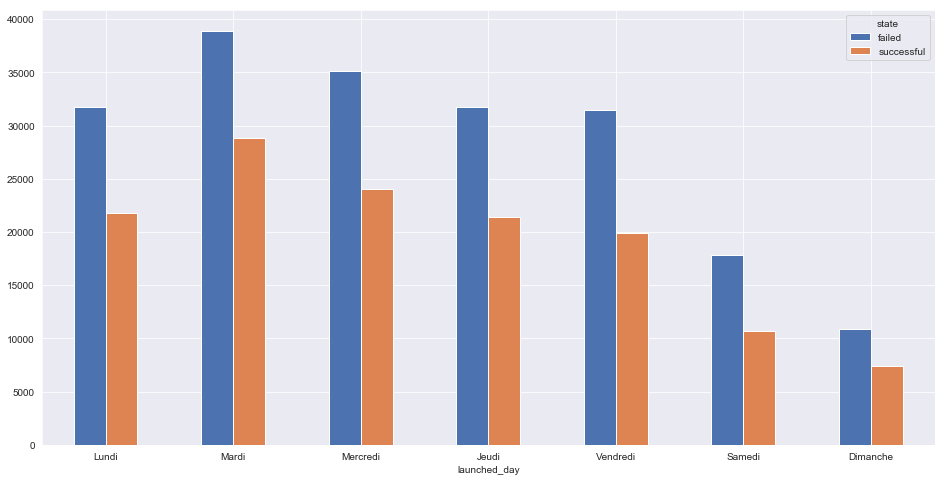

In [59]:
ax = df2.groupby('launched_day')['state'].value_counts().unstack().plot.bar()
ax.set_xticklabels(['Lundi','Mardi','Mercredi',"Jeudi","Vendredi", "Samedi", "Dimanche"],rotation=0)

Mardi est le jour de la semaine qui a à la fois le plus grand taux d'échec et de réussite par rapport aux autres jours de la semaine.

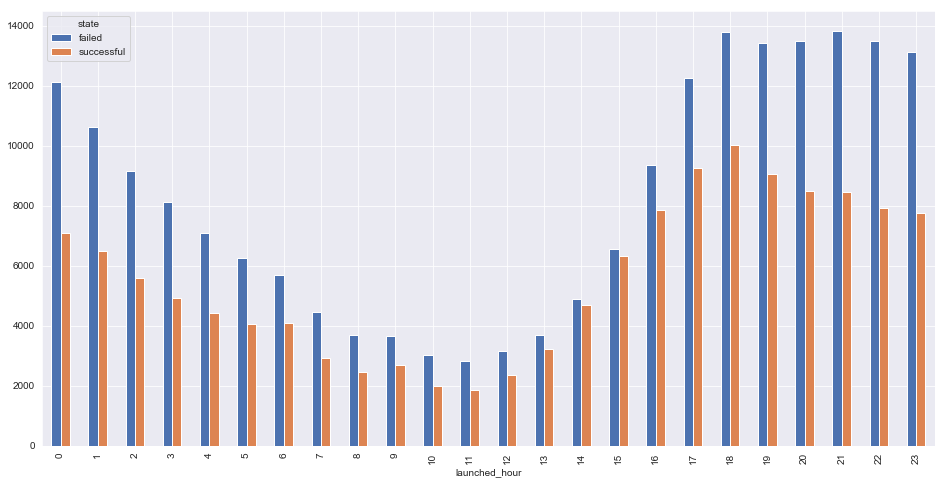

In [60]:
ax = df2.groupby('launched_hour')['state'].value_counts().unstack().plot.bar()

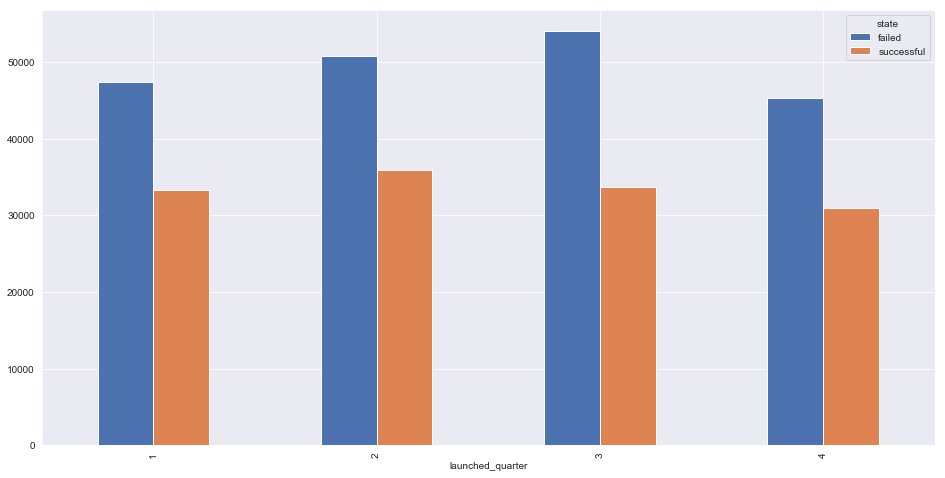

In [61]:
ax = df2.groupby('launched_quarter')['state'].value_counts().unstack().plot.bar()

## date dateline

In [62]:
df2['deadline_year'] = df2['deadline'].dt.year
df2['deadline_day'] = df2['deadline'].dt.dayofweek
df2['deadline_hour'] = df2['deadline'].dt.hour
df2['deadline_quarter'] = df2['deadline'].dt.quarter

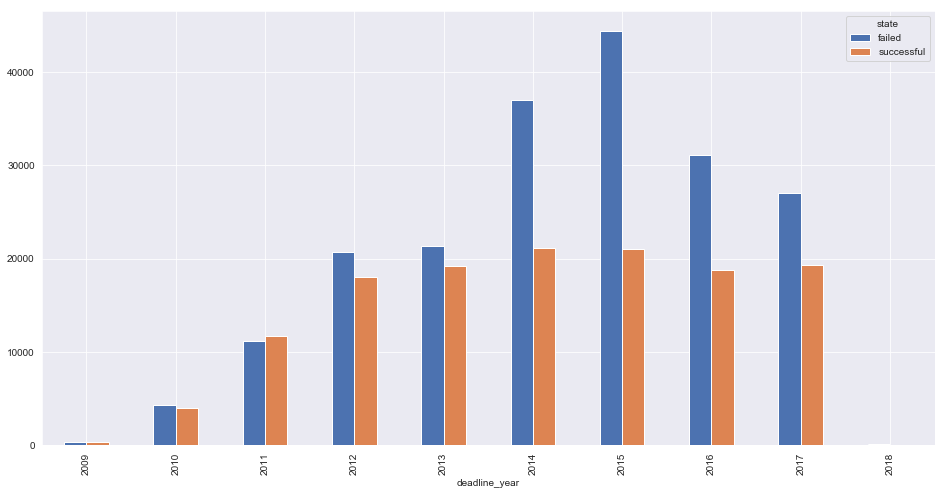

In [63]:
ax = df2.groupby('deadline_year')['state'].value_counts().unstack().plot.bar()

[Text(0,0,'Lundi'),
 Text(0,0,'Mardi'),
 Text(0,0,'Mercredi'),
 Text(0,0,'Jeudi'),
 Text(0,0,'Vendredi'),
 Text(0,0,'Samedi'),
 Text(0,0,'Dimanche')]

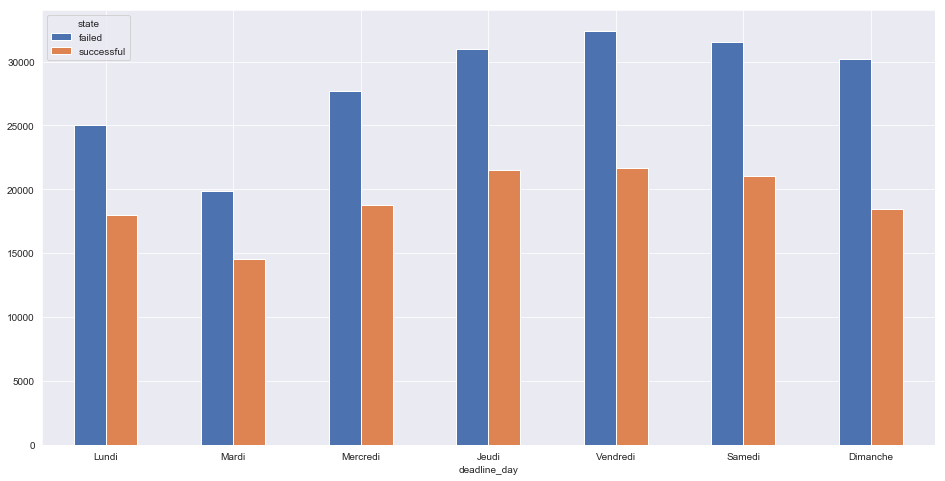

In [64]:
ax = df2.groupby('deadline_day')['state'].value_counts().unstack().plot.bar()
ax.set_xticklabels(['Lundi','Mardi','Mercredi',"Jeudi","Vendredi", "Samedi", "Dimanche"],rotation=0)

Le Vendredi est le jour où on a le plus de projet qui échouent ou réussissent.

# 6. Analyse Multivariée

In [66]:
df2.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'goal_norm',
       'pledged_norm', 'backers_norm', 'usd pledged_norm',
       'usd_pledged_real_norm', 'usd_goal_real_norm', 'backers_outliers',
       'launched_year', 'launched_day', 'launched_hour', 'launched_quarter',
       'deadline_year', 'deadline_day', 'deadline_hour', 'deadline_quarter'],
      dtype='object')

/Users/mbp/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


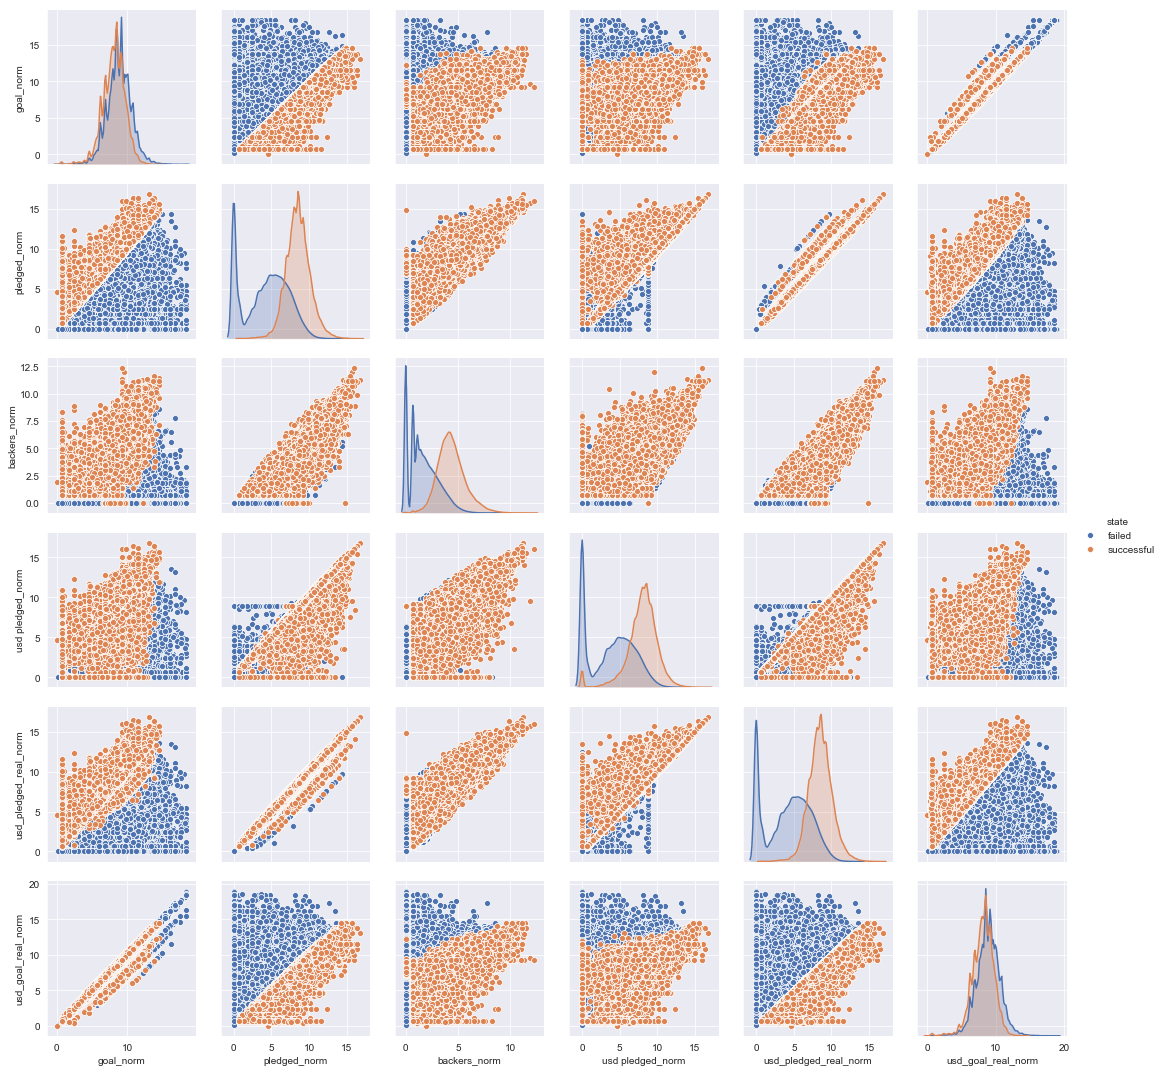

In [67]:
sns.pairplot(data=df2[['goal_norm',
       'pledged_norm', 'backers_norm', 'usd pledged_norm',
       'usd_pledged_real_norm', 'usd_goal_real_norm','state']],hue='state')

On voit que goal et usd_goal_real sont lineaires, c'est aussi le cas pour pledged et usd_pledged_real ...

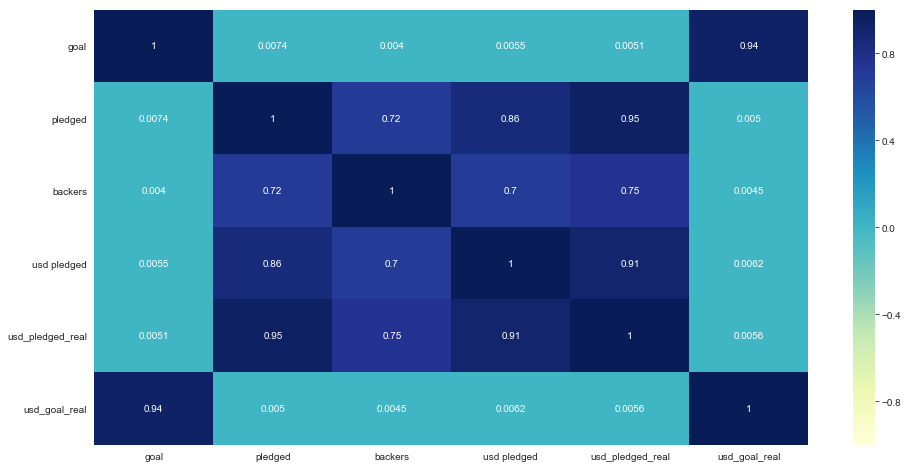

In [68]:
sns.heatmap(df[num_col].corr(),annot=True,vmin=-1,vmax=1, cmap="YlGnBu")

Forte corrélation entre:
- (goal, usd_goal_real);
- (pledged,backers);
- (pledged, usd pledged);
- (pledged, usd_pledged_real);
- (backers, usd pledged);
- (backers,usd_pledged_real);
- (usd pledged, usd_pledged_real)

On choissit usd_goal_real, backers, usd_pledged_real


# 7. Conclusion

- Product Design est la catégorie la plus convertie
- Music et Film & Video est la main catégory la plus convertie
- La feature date a un impact important sur la réussite d'un projet.
- On crée un autre feature qui mesure la durée du crowdfunding
- La feature backers est un feature qu'on peut prendre en référence pour créer d'autres features comme la feature interval de backers.
example: df["backers_inter", nombre de backer < 12, 12<= backer <=65, 65<backer<= 100 et backer >100.
- USD et GBP et EUR sont les devises plus utilisé
- On a des numériques features qui se sont corrélées
- On choissit usd_goal_real, backers, usd_pledged_real, category, main category, year, day...


# Prédiction

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [70]:
df2.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'goal_norm',
       'pledged_norm', 'backers_norm', 'usd pledged_norm',
       'usd_pledged_real_norm', 'usd_goal_real_norm', 'backers_outliers',
       'launched_year', 'launched_day', 'launched_hour', 'launched_quarter',
       'deadline_year', 'deadline_day', 'deadline_hour', 'deadline_quarter'],
      dtype='object')

In [71]:
feature = ['category','main_category', 'currency', 'country', 'goal_norm',
       'pledged_norm', 'backers_norm', 'usd pledged_norm',
       'usd_pledged_real_norm', 'usd_goal_real_norm','launched_year', 'launched_day', 'launched_hour', 'launched_quarter',
       'deadline_year', 'deadline_day', 'deadline_hour', 'deadline_quarter']

In [72]:
df2[feature+['state']].dtypes

category                  object
main_category             object
currency                  object
country                   object
goal_norm                float64
pledged_norm             float64
backers_norm             float64
usd pledged_norm         float64
usd_pledged_real_norm    float64
usd_goal_real_norm       float64
launched_year              int64
launched_day               int64
launched_hour              int64
launched_quarter           int64
deadline_year              int64
deadline_day               int64
deadline_hour              int64
deadline_quarter           int64
state                     object
dtype: object

## One hot encoding

In [73]:
df3 = df2[feature+['state']].copy()
from sklearn.preprocessing  import LabelEncoder
for c in ['category','main_category', 'currency', 'country', 'launched_year']:
    df3[c].astype(str)
    le = LabelEncoder()
    le.fit(df3[c])
    df3[c] = le.transform(df3[c])
df3[['category','main_category', 'currency', 'country', 'launched_year']].head()

,category,main_category,currency,country,launched_year
0,108,12,5,9,6
1,93,6,13,22,8
2,93,6,13,22,4
3,90,10,13,22,3
5,123,7,13,22,7


In [75]:
df3.columns

Index(['category', 'main_category', 'currency', 'country', 'goal_norm',
       'pledged_norm', 'backers_norm', 'usd pledged_norm',
       'usd_pledged_real_norm', 'usd_goal_real_norm', 'launched_year',
       'launched_day', 'launched_hour', 'launched_quarter', 'deadline_year',
       'deadline_day', 'deadline_hour', 'deadline_quarter', 'state'],
      dtype='object')

In [76]:
df3['state'].values

array(['failed', 'failed', 'failed', ..., 'failed', 'failed', 'failed'],
      dtype=object)

In [77]:
dt = df3.copy()
y = [1 if i == "successful" else 0 for i in dt['state'].values]
x = dt.drop('state',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=42)
clf = LogisticRegression()
clf.fit(x_train.values, y_train)
y_pred = clf.predict(x_test)
print(f"{100*accuracy_score(y_test,y_pred):.2f}%")

99.77%


# Conclusion prédiction

Si on prend toutes les features, on obtient un score de 99,77% pour la prédiction de notre modèle